<a href="https://colab.research.google.com/github/ShahJalal-Jamil/Textile-Research/blob/main/Feature_Ranking_Using_Random_Forest_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset load and Pre-processing
!git clone https://github.com/ShahJalal-Jamil/Textile-Research.git
import pandas as pd

df = pd.read_excel(r'/content/Textile-Research/data_textile.xlsx')
df = df.replace('Jersey', 0, regex=True)
df = df.replace('DLacoste', 1, regex=True)
df = df.replace('Fleece', 2, regex=True)
df = df.replace('Lacoste', 3, regex=True)
df = df.replace('Pique', 4, regex=True)
df = df.replace('Plain', 5, regex=True)
df = df.replace('RDenim', 6, regex=True)
df = df.replace('SDenim', 7, regex=True)
df = df.replace('Twill', 8, regex=True)
print (df)

fatal: destination path 'Textile-Research' already exists and is not an empty directory.
     Fabric Name  ST    MS  SPI  NN    FT  GSM    T_S  Tex     El  \
0              0   5  3500   10   9  0.18  160   4.75   30  15.00   
1              0   6  3800   10   9  0.21  160   5.15   30  15.00   
2              0   5  3600   10   9  0.22  160   5.15   30  15.00   
3              0   4  3500   10   9  0.22  160   5.15   30  17.00   
4              0   5  3500   10   9  0.21  160   5.15   30  15.00   
..           ...  ..   ...  ...  ..   ...  ...    ...  ...    ...   
995            7   6  3000   10  16  0.62  310  11.95  100  26.48   
996            7   5  2800   10  16  0.62  310  10.89  100  26.48   
997            7   7  3000   10  16  0.62  310  12.31  100  26.11   
998            7   5  2500   10  16  0.62  310  11.70  100  26.48   
999            7   4  2800   10  16  0.62  310  11.98  100  24.11   

     No of B._hr  Class (Y/N)  
0              2            1  
1              3  

In [ ]:
# Data Normalization

c = df.columns
for i in range(0,10):
    if i!= 5:
        column_name = c[i]
        print(column_name)
        l = df[column_name].unique()
        #print (l)
        print(l.size)
        max_value = max(l)
        for j in range(0,l.size):
            df[column_name] = df[column_name].replace(l[j], l[j]/max_value)
#print (df)



Fabric Name
9
ST
4
MS
11
SPI
3
NN
5
GSM
66
T_S
287
Tex
5
El
86


In [ ]:
#print (df)
features= df.iloc[:,:10]
print (features)
target= df.iloc[:,11]
print (target)

# Feature Name
c = df.columns
print (c[0:12])


     Fabric Name        ST     MS       SPI      NN    FT       GSM       T_S  \
0          0.000  0.714286  0.875  0.833333  0.5625  0.18  0.506329  0.339286   
1          0.000  0.857143  0.950  0.833333  0.5625  0.21  0.506329  0.367857   
2          0.000  0.714286  0.900  0.833333  0.5625  0.22  0.506329  0.367857   
3          0.000  0.571429  0.875  0.833333  0.5625  0.22  0.506329  0.367857   
4          0.000  0.714286  0.875  0.833333  0.5625  0.21  0.506329  0.367857   
..           ...       ...    ...       ...     ...   ...       ...       ...   
995        0.875  0.857143  0.750  0.833333  1.0000  0.62  0.981013  0.853571   
996        0.875  0.714286  0.700  0.833333  1.0000  0.62  0.981013  0.777857   
997        0.875  1.000000  0.750  0.833333  1.0000  0.62  0.981013  0.879286   
998        0.875  0.714286  0.625  0.833333  1.0000  0.62  0.981013  0.835714   
999        0.875  0.571429  0.700  0.833333  1.0000  0.62  0.981013  0.855714   

     Tex        El  
0    0

Feature ranking:
1. feature 7 (0.344403199542219)
2. feature 9 (0.2624498865444755)
3. feature 2 (0.11094296274611064)
4. feature 1 (0.09207420958126074)
5. feature 5 (0.08273524093192992)
6. feature 6 (0.06737576611081512)
7. feature 3 (0.01658816877284548)
8. feature 4 (0.016529273013414378)
9. feature 0 (0.006901292756929264)
10. feature 8 (0.0)


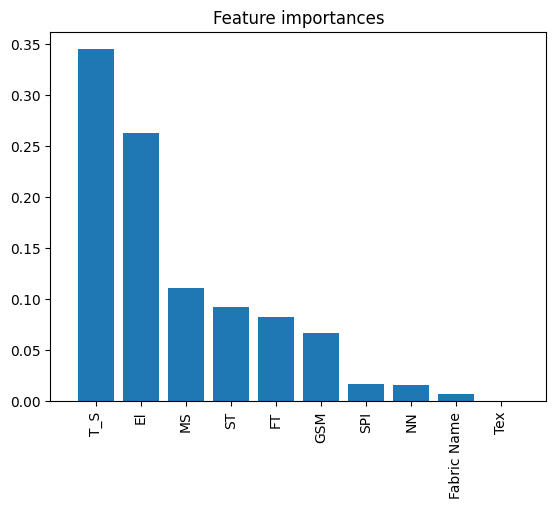

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Step 2: Load your dataset (this example uses the Iris dataset)
#from sklearn.datasets import load_iris
data = df
X, y = features, target
feature_names = c[0:11]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Retrieve and visualize the feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# Feature Ranking Using Random Forest Algorithm

Feature ranking:
1. feature 'T_S' (0.2639336721092654)
2. feature 'El' (0.196030352691763)
3. feature 'MS' (0.13157702243166983)
4. feature 'FT' (0.11350463666938093)
5. feature 'GSM' (0.11307218489661844)
6. feature 'ST' (0.07946316567066325)
7. feature 'Fabric Name' (0.04213622772820256)
8. feature 'NN' (0.03226870169712867)
9. feature 'SPI' (0.018648035296961615)
10. feature 'Tex' (0.009366000808346372)


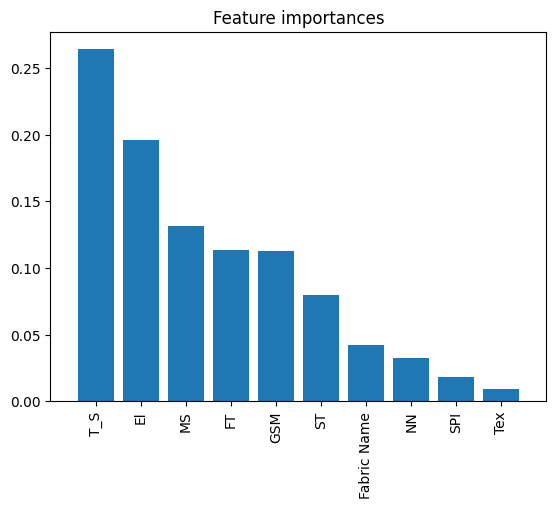

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 2: Load your dataset (this example uses the Iris dataset)
data = load_iris()
X, y = features, target
feature_names = c[0:11]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Retrieve and visualize the feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking with names
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature '{feature_names[indices[f]]}' ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
